In [1]:
from deeptables.datasets import dsutils
from deeptables.eda.utils import columns_info
from deeptables.models import make_experiment
from sklearn.model_selection import train_test_split


## Load data


In [2]:
df = dsutils.load_bank().head(10000)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

train_data.shape, test_data.shape

((8000, 18), (2000, 18))

## Analyze data

In [3]:
# columns_info(train_data)

## Make experiment and run it

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(8000, 17)","(8000,)",None,None,None,binary(2)


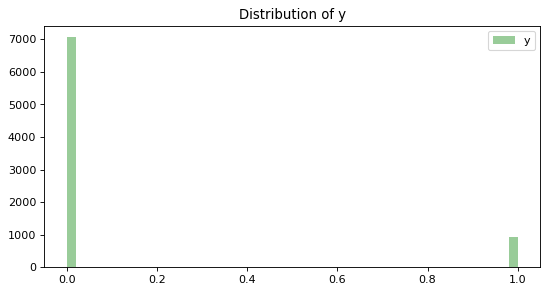

## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[id, age, job, marital, education, default, ba..."
1,selected_features,"[id, age, job, marital, education, default, ba..."
2,unselected_features,[]
3,X_train.shape,"(8000, 17)"
4,y_train.shape,"(8000,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{}
9,kept/dropped feature count,17/0


### Elapsed

* 0.057 seconds

## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Experiment Settings:

HyperDT(searcher=EvolutionSearcher(space_fn=<function mini_dt_space at 0x7fb00459fcb0>, population_size=30, sample_size=10, regularized=True, optimize_direction='max', space_sample_validation_fn=<function mini_dt_space_validator at 0x7fb00459fd40>, random_state=RandomState(MT19937) at 0x7FB003CA2050), callbacks=[EarlyStoppingCallback(max_no_improvement_trials=10, mode='max', time_limit=3599.9423274993896), NotebookCallback(), ProgressiveCallback()], reward_metric='Precision', max_model_size=None)

,X,y,X_eval,y_eval,cv,num_folds,max_trials,fit_kwargs
0,"(8000, 17)","(8000,)",None,None,True,3,5,"(pos_label, verbose, n_jobs)"


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,5,0.120317,2,0.507937,33.065014,5,5


#### Best Trial:

key,value
signature,9fa4b26cd239f2a4900fa82e43d06519
vectors,"[5, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]"
0-Module_DTModuleSpace_1.nets,"['dnn_nets', 'fm_nets']"
1-Module_DTModuleSpace_1.auto_categorize,False
2-Module_DTModuleSpace_1.cat_remain_numeric,True
3-Module_DTModuleSpace_1.auto_discrete,False
4-Module_DTModuleSpace_1.apply_gbm_features,True
5-Module_DTModuleSpace_1.gbm_feature_type,dense
6-Module_DTModuleSpace_1.embeddings_output_dim,4
7-Module_DTModuleSpace_1.embedding_dropout,0


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,2,0.507937,6.072648,"[5, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ..."
1,3,0.361022,8.402343,"[5, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ..."
2,4,0.321230,6.882224,"[4, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, ..."
3,5,0.120317,4.304229,"[2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, ..."
4,1,0.092308,7.289087,"[3, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, ..."


search:   0%|          | 0/5 [00:00<?, ?it/s]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


### Fitted parameters

,key,value
0,input_features,"[id, age, job, marital, education, default, ba..."
1,best_reward,0.507937
2,history,"TrialHistory(direction='max', size=5, succeede..."


### Elapsed

* 33.111 seconds

## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,"make_scorer(precision_score, average=binary, p..."


### Fitted parameters

,0,1
0,weights,"[0.85, 0.05, 0.0, 0.05, 0.05]"
1,scores,"[0.7692307692307693, 0.7692307692307693, 0.785..."
2,best_stack,"[0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, ..."
3,hits,"{0: 17, 1: 1, 4: 1, 3: 1}"
4,ensemble_size,20


### Elapsed

* 6.056 seconds

In [4]:
experiment=make_experiment(train_data.copy(), target='y', reward_metric='Precision', pos_label='yes', max_trials=5)
estimator=experiment.run()

## Evaluate the estimator with classification_report

In [5]:
from sklearn.metrics import classification_report

X_test = test_data.copy()
y_test = X_test.pop('y')
y_pred = estimator.predict(X_test)
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

          no    0.89050   1.00000   0.94208      1781
         yes    0.00000   0.00000   0.00000       219

    accuracy                        0.89050      2000
   macro avg    0.44525   0.50000   0.47104      2000
weighted avg    0.79299   0.89050   0.83892      2000



## Export Estimator with Hypernets utility

In [6]:
from hypernets.utils import load_estimator, save_estimator

save_estimator(estimator,'dt_automl_model')